In [544]:
CLIENT_ID=*SEE NOTES*
CLIENT_SECRET=*SEE NOTES*

In [51]:
blockbuster = 'spotify:track:5jQYkYhoOlBW4vJ2l4TCxl' # Test track from Run the Jewels

In [43]:
import spotipy
from spotipy import util
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import urllib

## REMOVE BEFORE PUSHING ##
CLIENT_ID=
CLIENT_SECRET=



username = 'elw86ve5g5t944wwlef6qyzu3' # Alex Fioto's user id
modify_playlist = 'playlist-modify-public'
user_auth = 'user-top-read'
redirect_uri = 'https://alexfioto.github.io/'

token = util.prompt_for_user_token(username=username,
                                   scope=modify_playlist,
                                   client_id=CLIENT_ID,
                                   client_secret=CLIENT_SECRET,
                                   redirect_uri=redirect_uri) 
sp = spotipy.Spotify(auth=token)


In [20]:
def show_album_art(uri):
    # Getting track object
    track = sp.track(uri)
    
    # Extracting image URL 
    url = track['album']['images'][0]['url']
    
    # Creating file object
    f = urllib.request.urlopen(url)
    
    # Creating an matplotlib image read object specifying jpg format
    a = plt.imread(f, format='jpg')
    
    # Turning off axis
    plt.axis(False)
    
    # Showing image
    plt.imshow(a);

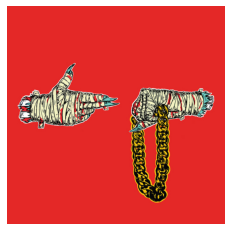

In [21]:
show_album_art(blockbuster)

In [624]:
def spotify_uri_search(search, type='album', limit=10):
    '''
    Search for a Spotify track or album URI. 
    '''
    # Creating empty results list and results dictionary
    results = []
    res_dict = {}

     # Replacing spaces with + 
    q = search.replace(' ', '+')

    # Creating search object
    res = sp.search(q=q, type=type)

    # Selecting all of the tracks in search object
    tracks = res[type+'s']['items']
    
    # Iterating through tracks or albums 
    for item in tracks:
        # Creating result dictionary entry
        res_dict[item['name']] = item['uri']
        
        # Adding name of track or album along with the artists to results
        results.append(item['name'] + ' by ' + item['artists'][0]['name'])
    
    # Printing results for user to decide which album
    for i in range(len(results)):
        print(f'{i}: {results[i]}')
        
    # Requesting user input for correct choice
    response = input('Please select a valid index')
    
    # Selecting appropriate Spotify URI
    uri = res_dict.get(results[int(response)].split(' by ')[0])
    
    return uri

In [625]:
spotify_uri_search('rage', 'album')

0: Rage Against The Machine - XX (20th Anniversary Special Edition) by Rage Against The Machine
1: Rage by Gressartikas
2: Rage Against The Machine by Rage Against The Machine
3: Rage Valley by Knife Party
4: Luv Is Rage 2 by Lil Uzi Vert
5: Rage and Tragedy by Lost Dog Street Band
6: Evil Empire by Rage Against The Machine
7: The Battle Of Los Angeles by Rage Against The Machine
8: Rage of Angels by Santino Le Saint
9: Rage by 637godwin


Please select a valid index 0


'spotify:album:4Io5vWtmV1rFj4yirKb4y4'

In [610]:
res = sp.search(q=q, type='album')
res['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5y2Xq6xcjJb2jVM54GHK3t'},
   'href': 'https://api.spotify.com/v1/artists/5y2Xq6xcjJb2jVM54GHK3t',
   'id': '5y2Xq6xcjJb2jVM54GHK3t',
   'name': 'John Legend',
   'type': 'artist',
   'uri': 'spotify:artist:5y2Xq6xcjJb2jVM54GHK3t'}],
 'available_markets': ['AD',
  'AE',
  'AL',
  'AR',
  'AT',
  'AU',
  'BA',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'BY',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HR',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'KZ',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MD',
  'ME',
  'MK',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'RS',
  'RU',
  'SA',
  'SE',
  'SG',
  'SI',
  'SK'

In [590]:
res_dict

{'Hood Rich': 'spotify:track:5H3c7nLyycQOkvZjtojFr3',
 'Tha Block Is Hot': 'spotify:track:6JeGO13ate4ycPgegtCtpr'}

In [372]:
def choose_uri(results, res_dict):
    print(results)
    idx = input('Select index of song above.')
    choice = results[int(idx)].split(' by ')[0]
    return res_dict.get(choice)

In [373]:
uri = choose_uri(results, res_dict)

['Blockbuster Night, Pt. 1 by Run The Jewels', 'Blockbuster Night, Pt. 2 - Bonus Track by Run The Jewels', 'Blockbuster Night Pt. 1 - Live From SXSW / 2015 by Run The Jewels', 'Blockbuster Night, Pt. 1 by Run The Jewels', 'Quantum of Solace: Night at the Opera (arr. N. Raine for orchestra) by David Arnold', 'Quantum of Solace: A Night at the Opera by Royal Philharmonic Orchestra', 'Blockbuster Night, Pt. 1 by Run The Jewels', 'Rock All Night by The Blockbusters', 'Blockbuster Night by Luu Breeze', 'Blockbuster Nights by Leonard Dstroy']


Select index of song above. 0


In [16]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
import pandas as pd
pd.set_option("display.precision", 14)

In [47]:
def recommend_songs(artists=None, genres=None, tracks=None, limit=100, n_tracks=10):
    uri = tracks[0]
    track_audio = sp.audio_features(uri)
    track = sp.track(uri)
    df = pd.DataFrame.from_dict(track_audio)
    df['track_name'] = track['name']
    
    res = sp.recommendations(seed_artists=artists, seed_genres=genres, seed_tracks=tracks, limit=limit)
    
    names = []
    uris = []
    for track in res['tracks']:
        names.append(track['name'])
        uris.append(track['uri'])
    
    features = sp.audio_features(uris)
    for i in range(len(features)):
        features[i]['track_name'] = names[i]
    features_df = pd.DataFrame.from_dict(features)
    
    df = pd.concat([df, features_df])
    df.reset_index(inplace=True, drop=True)
    
    numeric_features = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'track_name'], axis=1)
    
    sims = cosine_similarity(X=numeric_features, Y=numeric_features[:1])
    df['similarities'] = sims
    sorted_df = df.sort_values('similarities', ascending=False)
    
    sorted_df = sorted_df[:n_tracks+1]
    for uri in sorted_df['uri']:
        print(uri)
    for name in sorted_df['track_name']:
        print(name)
    
    
    return sorted_df

In [48]:
df = recommend_songs(tracks=['spotify:track:5jQYkYhoOlBW4vJ2l4TCxl'])

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:6eL1ncVDtQHgSm3E288TS7
spotify:track:2R0MySb9tgrWIv2mttYAYR
spotify:track:6h5Mjne0MzHEX4t9rEQN75
spotify:track:4DO5sD9fghVKEkPVM9PP8x
spotify:track:7uer04FLTB7mt2ImHP6XjE
spotify:track:2rk0lCpO1vkKAQ6BC8bjUX
spotify:track:6sgwKljdnXRGVnfbNcUNwo
spotify:track:6JKoTnberZoBgUuxa6l4Kh
spotify:track:545cKgvj9c85Umv1FHG6l2
spotify:track:0ZihFuThMaeARjmxTsoNFe
Blockbuster Night, Pt. 1
Big Fish
Deception
None Shall Pass
Beautiful Life (feat. Action Bronson & Joey Bada$$)
Connect Four
Jazz
DDFH
Hive (feat. Vince Staples & Casey Veggies)
Boom Bye Yeah
the ground below (feat. Royal Blood) - Royal Jewels Mix


In [63]:
recs = sp.recommendations(seed_tracks=[blockbuster])
uri = recs['tracks'][0]['uri']

In [67]:
sp.track(uri)['name']

'The Space Program'

In [499]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
import pandas as pd
pd.set_option("display.precision", 14)


In [351]:
numeric = features_df.drop(['track_name', 'uri'], axis=1)

In [352]:
numeric

,popularity,danceability,valence,tempo,time_signature,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness
0,66,0.826,0.653,99.130,4,0.566,10,-10.747,0,0.3100,0.19700,0.000000,0.3560
1,60,0.526,0.283,81.305,4,0.936,8,-4.576,1,0.2630,0.31600,0.000384,0.2610
2,57,0.483,0.204,114.382,4,0.841,5,-5.115,0,0.0964,0.01080,0.000003,0.3820
3,61,0.678,0.498,80.318,4,0.662,1,-6.473,1,0.3000,0.01230,0.000000,0.1330
4,48,0.650,0.829,88.306,4,0.806,10,-4.293,0,0.2550,0.10100,0.000000,0.2810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,0.547,0.608,146.750,3,0.884,8,-1.452,1,0.3660,0.02210,0.000001,0.0662
96,37,0.744,0.224,96.997,4,0.836,4,-6.308,0,0.0467,0.44200,0.002940,0.0978
97,48,0.331,0.177,83.687,4,0.659,7,-10.640,1,0.0795,0.00352,0.000027,0.0820
98,42,0.609,0.230,88.149,4,0.712,0,-6.478,1,0.2520,0.00501,0.143000,0.6290


In [430]:
len(numeric_features[:1])

1

In [494]:
sims = cosine_similarity(X=numeric_features, Y=numeric_features[:1])

In [495]:
df['similarities'] = sims

In [35]:
uri_to_add = []
for uri in df['uri']:
    uri_to_add.append(uri)

In [62]:
sp.current_user()['id']

'elw86ve5g5t944wwlef6qyzu3'

In [23]:
playlist = sp.user_playlist_create(user=username, name='Spotipy Test', public=True, description='Testing')

In [25]:
playlist_id = playlist['id']

In [38]:
sp.user_playlist_add_tracks(user=username, 
                            playlist_id = playlist_id,
                            tracks = uri_to_add)

{'snapshot_id': 'MyxkMWZhYjk0YTEwMzkwMTlkZGU5Njc4N2RjYWVmNjUyMmMwMjc5MTI3'}

In [627]:
# List of recommendation genre seeds
sp.recommendation_genre_seeds()

{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',


In [584]:
recommend_songs(tracks=[blockbuster], n_tracks=100)

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:5POEFQCKtD0QxYLfZ2kqEx
spotify:track:5jJ69cMDMC0aeWPjZo6VP2
spotify:track:1EjzcBTVLV7ATtdsQwyV31
spotify:track:24vNw0Z0srb4zYXwrakw8E
spotify:track:2uxudaBcJamtfgvUjSDdkZ
spotify:track:6LyzqxbVyIUoDtr4dYshIl
spotify:track:1TNLYKpEPZ0g6jQq34pDcU
spotify:track:2fClGossFdEdhjjeYceaN7
spotify:track:3SlMNSBqe7y3kzrOTI72WI
spotify:track:4AHZRMJCpscmxygCNtC2Qq
spotify:track:2rk0lCpO1vkKAQ6BC8bjUX
spotify:track:0PDGCtMLGQ6zbKMMuqltuY
spotify:track:2Pp3QD3thPnk2kCxmu2MHK
spotify:track:5YpZh8wfS4moRBk0ijNcXr
spotify:track:6JKoTnberZoBgUuxa6l4Kh
spotify:track:1LM6EReMkAxuDXDF26ekl2
spotify:track:0RdiYSv0mUfqYXN5WwYXjl
spotify:track:6npcJbgDhtWeNT5iOGsjZI
spotify:track:6w6SW8zyEcyxwSR7Wya45a
spotify:track:0301nLjG0ti26rx5ZmfqtP
spotify:track:6plT7nFGiXKSBP9HFSI4ef
spotify:track:3gRlmtdCyNoKiyozn2pqc9
spotify:track:7uL9Q8h4hzzCuGTZ3Yttmv
spotify:track:6EC5JMW0hwIRawSOVJfVQn
spotify:track:50jXnyrzW4mcBBqFTMEoAC
spotify:track:48ZUwXrEOhaXLCxvmRYhZv
s

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,popularity,similarities
0,0.701,0.525,1,-7.938,0,0.3820,0.03530,0.00000255,0.0615,0.385,...,audio_features,5jQYkYhoOlBW4vJ2l4TCxl,spotify:track:5jQYkYhoOlBW4vJ2l4TCxl,https://api.spotify.com/v1/tracks/5jQYkYhoOlBW...,https://api.spotify.com/v1/audio-analysis/5jQY...,152253,4,"Blockbuster Night, Pt. 1",59,1.00000000000000
9,0.760,0.828,1,-4.532,1,0.0789,0.04780,0.00042700,0.0893,0.923,...,audio_features,5POEFQCKtD0QxYLfZ2kqEx,spotify:track:5POEFQCKtD0QxYLfZ2kqEx,https://api.spotify.com/v1/tracks/5POEFQCKtD0Q...,https://api.spotify.com/v1/audio-analysis/5POE...,160507,4,BagBak,56,0.99999999884483
78,0.659,0.906,7,-3.906,0,0.0428,0.15600,0.00000327,0.1050,0.792,...,audio_features,5jJ69cMDMC0aeWPjZo6VP2,spotify:track:5jJ69cMDMC0aeWPjZo6VP2,https://api.spotify.com/v1/tracks/5jJ69cMDMC0a...,https://api.spotify.com/v1/audio-analysis/5jJ6...,187720,4,Lampshades on Fire,59,0.99999999629938
3,0.595,0.878,10,-5.630,0,0.4230,0.17200,0.00000000,0.3030,0.746,...,audio_features,1EjzcBTVLV7ATtdsQwyV31,spotify:track:1EjzcBTVLV7ATtdsQwyV31,https://api.spotify.com/v1/tracks/1EjzcBTVLV7A...,https://api.spotify.com/v1/audio-analysis/1Ejz...,146573,4,yankee and the brave (ep. 4),60,0.99999999581409
51,0.826,0.566,10,-10.747,0,0.3100,0.19700,0.00000000,0.3560,0.653,...,audio_features,24vNw0Z0srb4zYXwrakw8E,spotify:track:24vNw0Z0srb4zYXwrakw8E,https://api.spotify.com/v1/tracks/24vNw0Z0srb4...,https://api.spotify.com/v1/audio-analysis/24vN...,216133,4,Wu-Tang Clan Ain't Nuthing ta F' Wit,66,0.99999999506150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.297,0.508,2,-6.471,1,0.0793,0.00204,0.00291000,0.4190,0.105,...,audio_features,1kTef9tFF9gRK4xd66swrG,spotify:track:1kTef9tFF9gRK4xd66swrG,https://api.spotify.com/v1/tracks/1kTef9tFF9gR...,https://api.spotify.com/v1/audio-analysis/1kTe...,162453,4,Ryderz,33,0.99999983767311
35,0.638,0.741,1,-6.012,0,0.2920,0.03430,0.00000000,0.0761,0.702,...,audio_features,7w9lcJGLImMytniCQkJqJC,spotify:track:7w9lcJGLImMytniCQkJqJC,https://api.spotify.com/v1/tracks/7w9lcJGLImMy...,https://api.spotify.com/v1/audio-analysis/7w9l...,166907,4,Kirby,48,0.99999983240610
72,0.525,0.746,7,-5.810,1,0.2190,0.17500,0.00000000,0.3230,0.755,...,audio_features,01zffoSenvp9JnSbl0UgMa,spotify:track:01zffoSenvp9JnSbl0UgMa,https://api.spotify.com/v1/tracks/01zffoSenvp9...,https://api.spotify.com/v1/audio-analysis/01zf...,154483,4,Put Jewels on It,32,0.99999978676568
84,0.615,0.648,11,-6.604,0,0.3520,0.02680,0.00000000,0.5150,0.479,...,audio_features,1UsHdJAj4Y1sMIqAh1mS02,spotify:track:1UsHdJAj4Y1sMIqAh1mS02,https://api.spotify.com/v1/tracks/1UsHdJAj4Y1s...,https://api.spotify.com/v1/audio-analysis/1UsH...,132050,3,Story 2,45,0.99999971164857


In [ ]:
sp.

In [626]:
wagner = 'spotify:track:1U1i1HBJ5H8DY5J4fO8ySg'
recommend_songs(tracks=[wagner], n_tracks=20)

spotify:track:1U1i1HBJ5H8DY5J4fO8ySg
spotify:track:5BfYMZUqH60CizAC6zgx7s
spotify:track:5jOsrEhMayDdME9K57KQFo
spotify:track:4P0NNp7hjBUA2PmmWcJ4Ko
spotify:track:19fcbNdQCjFlotNOax1iiz
spotify:track:2cmj3YBz0w78IW2fcvRImE
spotify:track:2Z4aQJh0kesRMookvtfR4y
spotify:track:2kAgCRZPG3YQR2VMqRvLmb
spotify:track:2yJVk6jfa2xAEqVb2qDFgn
spotify:track:7E1ErYYCn0lYjHODZ1qGuB
spotify:track:4WhWxSgIGEs69HwSjGYM1q
spotify:track:6lnttZF0hDaVyVZBEgpJ3I
spotify:track:7qUPbq0u2XVyCW2s36EfhM
spotify:track:0aRiMAA8tDopLimDxIKTaB
spotify:track:0hsbqx7SHOrCpmPaYJ4Qwv
spotify:track:1FDMJ0sheMse5ELss1p7s0
spotify:track:6aIL3VxfCtIqcnV4mYu8B5
spotify:track:0cqcRqZgkNHanWQ8slYA0v
spotify:track:09HY1durG6DXbP5lZyp1VZ
spotify:track:02vw0tjLamMJAzMlCSiNH3
spotify:track:2OWzoQiL6VDTczQwBxmWVx
Tannhäuser: Overture
La Moldau
Symphony No. 9 in E Minor, From The New World: Symphony No. 9 "New World Symphony": IV. Allegro con fuoco
Rhapsody In Blue
Concierto de Aranjuez for Guitar and Orchestra: 2. Adagio
Scheherezad

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,popularity,similarities
0,0.0897,0.16000,4,-15.986,1,0.0357,0.832,0.834,0.1400,0.0579,...,audio_features,1U1i1HBJ5H8DY5J4fO8ySg,spotify:track:1U1i1HBJ5H8DY5J4fO8ySg,https://api.spotify.com/v1/tracks/1U1i1HBJ5H8D...,https://api.spotify.com/v1/audio-analysis/1U1i...,853827,4,Tannhäuser: Overture,46,1.00000000000000
6,0.1090,0.14600,7,-16.413,1,0.0327,0.876,0.779,0.0800,0.0370,...,audio_features,5BfYMZUqH60CizAC6zgx7s,spotify:track:5BfYMZUqH60CizAC6zgx7s,https://api.spotify.com/v1/tracks/5BfYMZUqH60C...,https://api.spotify.com/v1/audio-analysis/5BfY...,809452,4,La Moldau,43,0.99999999998291
74,0.2010,0.18000,4,-19.533,0,0.0504,0.894,0.916,0.7030,0.1040,...,audio_features,5jOsrEhMayDdME9K57KQFo,spotify:track:5jOsrEhMayDdME9K57KQFo,https://api.spotify.com/v1/tracks/5jOsrEhMayDd...,https://api.spotify.com/v1/audio-analysis/5jOs...,690000,4,"Symphony No. 9 in E Minor, From The New World:...",35,0.99999999990899
64,0.3080,0.24700,9,-15.862,1,0.0441,0.975,0.769,0.0968,0.1130,...,audio_features,4P0NNp7hjBUA2PmmWcJ4Ko,spotify:track:4P0NNp7hjBUA2PmmWcJ4Ko,https://api.spotify.com/v1/tracks/4P0NNp7hjBUA...,https://api.spotify.com/v1/audio-analysis/4P0N...,889978,4,Rhapsody In Blue,37,0.99999999983110
61,0.1950,0.03870,11,-21.822,0,0.0407,0.921,0.926,0.1020,0.0581,...,audio_features,19fcbNdQCjFlotNOax1iiz,spotify:track:19fcbNdQCjFlotNOax1iiz,https://api.spotify.com/v1/tracks/19fcbNdQCjFl...,https://api.spotify.com/v1/audio-analysis/19fc...,690000,4,Concierto de Aranjuez for Guitar and Orchestra...,39,0.99999999983097
63,0.2350,0.28200,0,-15.247,1,0.0523,0.915,0.709,0.2000,0.1030,...,audio_features,2cmj3YBz0w78IW2fcvRImE,spotify:track:2cmj3YBz0w78IW2fcvRImE,https://api.spotify.com/v1/tracks/2cmj3YBz0w78...,https://api.spotify.com/v1/audio-analysis/2cmj...,762040,4,"Scheherezade, Op. 35: IV. The Festival of Bagd...",31,0.99999999966812
53,0.3030,0.11900,9,-18.055,0,0.0386,0.975,0.880,0.1120,0.0380,...,audio_features,2Z4aQJh0kesRMookvtfR4y,spotify:track:2Z4aQJh0kesRMookvtfR4y,https://api.spotify.com/v1/tracks/2Z4aQJh0kesR...,https://api.spotify.com/v1/audio-analysis/2Z4a...,820853,4,"Piano Concerto in A Minor, Op.16: I. Allegro m...",59,0.99999999961679
73,0.0811,0.01220,4,-32.654,0,0.0511,0.902,0.308,0.0648,0.0384,...,audio_features,2kAgCRZPG3YQR2VMqRvLmb,spotify:track:2kAgCRZPG3YQR2VMqRvLmb,https://api.spotify.com/v1/tracks/2kAgCRZPG3YQ...,https://api.spotify.com/v1/audio-analysis/2kAg...,935360,4,The Lark Ascending,66,0.99999999959908
56,0.0745,0.07730,7,-20.663,1,0.0449,0.414,0.884,0.1190,0.0383,...,audio_features,2yJVk6jfa2xAEqVb2qDFgn,spotify:track:2yJVk6jfa2xAEqVb2qDFgn,https://api.spotify.com/v1/tracks/2yJVk6jfa2xA...,https://api.spotify.com/v1/audio-analysis/2yJV...,1086533,4,Fantasia on a Theme by Thomas Tallis,39,0.99999999958733
7,0.3540,0.04870,5,-24.568,1,0.0323,0.783,0.484,0.2840,0.2530,...,audio_features,7E1ErYYCn0lYjHODZ1qGuB,spotify:track:7E1ErYYCn0lYjHODZ1qGuB,https://api.spotify.com/v1/tracks/7E1ErYYCn0lY...,https://api.spotify.com/v1/audio-analysis/7E1E...,948787,3,"Ravel: Boléro, M. 81",44,0.99999999954630
